# LOAN DATASET

In this module we will be doing data visualisation with the help of a case study. This will enables to understand how visualisation aids you in solving business problems. 

**Problem Statement**

the company wants to understand the driving factors behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. You can ask questions like:
- Whats the criteria for loan defaulters (General Observations)? 


In [1]:
#import the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime  
loan_data = pd.read_csv("loan.csv",low_memory=False)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)


### Data Handling and Cleaning

The first few steps involve making sure that there are no missing values or incorrect data types before we proceed to the analysis stage. These aforementioned problems are handled as follows:

    For Missing Values: Some common techniques to treat this issue are
        Dropping the rows containing the missing values
        Imputing the missing values
        Keep the missing values if they don't affect the analysis

    Incorrect Data Types:
        Clean certain values
        Clean and convert an entire column



In [2]:
def cleanpercentage(string):
    clean="".join(filter(lambda x: x!='%', string))
    return float(clean)


def salary_stats(value):
    if value <= 10000:
        return "VERY LOW < 10K"
    if 10000 <= value < 25000:
        return "LOW < 25K"
    elif 25000 <= value < 40000:
        return "AVERAGE < 40K"
    elif 40000 <= value < 50000:
        return "BETTER < 50K"
    elif 50000 <= value < 100000:
        return "GOOD LESS THAN 100K"
    elif value >= 100000:
        return "HIGH GREATER THAN 100K"
    

def interest_rate_stats(value):
    if value <= 5:
        return "Interest Rate between 0-5"
    if 5 <= value < 10:
        return "Interest Rate between 5-9"
    elif 10 <= value < 15:
        return "Interest Rate between 10-14"
    elif 15 <= value < 20:
        return "Interest Rate between 15-19"
    elif 20 <= value < 25:
        return "Interest Rate between 20-24"
    elif 25 <= value < 30:
        return "Interest Rate between 25-29"
    elif 30 >= 100000:
        return "Interest Rate >= 30"
    
    
###DATA CLEANING - FIX THE COLUMNS  - create a dataset with just necessary columns 
loan_data_updated = loan_data[["id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment",
                               "grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc",
                               "verification_status","issue_d","loan_status", "url","desc","purpose","title","zip_code",
                               "addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq",
                               "mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status",
                               "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee",
                               "recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d",
                               "last_credit_pull_d",  "pub_rec_bankruptcies" 
                              ]]

###DATA CLEANING - Fix type and clean data 
loan_data_updated.loc[loan_data_updated["verification_status"] == "Source Verified", "verification_status"] = "Verified"
loan_data_updated['int_rate'] = loan_data_updated['int_rate'].apply(cleanpercentage)
loan_data_updated['revol_util'] = loan_data_updated['revol_util'].astype(str)
loan_data_updated['term'] =  loan_data_updated['term'].apply(lambda x: x.strip())
loan_data_updated['term'] = loan_data_updated['term'].apply(lambda x: x.replace(' months', ''))
loan_data_updated['term'] = loan_data_updated['term'].astype(float)
loan_data_updated["mths_since_last_delinq"] = loan_data_updated["mths_since_last_delinq"].fillna(0)
loan_data_updated["mths_since_last_record"] = loan_data_updated["mths_since_last_record"].fillna(0)
loan_data_updated["pub_rec_bankruptcies"] = loan_data_updated["pub_rec_bankruptcies"].fillna(0)
loan_data_updated["rec_bankruptcy"] = loan_data_updated["pub_rec_bankruptcies"] 
loan_data_updated.drop(columns=['pub_rec_bankruptcies'])

loan_data_updated["emp_length"] = loan_data_updated["emp_length"].fillna(0)
loan_data_updated["emp_title"] = loan_data_updated["emp_title"].fillna(0)
loan_data_updated["desc"] = loan_data_updated["desc"].fillna(0)
loan_data_updated["title"] = loan_data_updated["title"].fillna(0)
      
###DATA CLEANING - Add values for null comumns 
loan_data_updated['last_credit_pull_d'] = loan_data_updated['last_credit_pull_d'].replace(np.nan, '1970-01-01')
loan_data_updated['next_pymnt_d'] = loan_data_updated['next_pymnt_d'].replace(np.nan, '1970-01-01')
loan_data_updated['last_pymnt_d'] = loan_data_updated['last_pymnt_d'].replace(np.nan, '1970-01-01')

#appended 2023 year, As per CSV Data is just available for 2023 as just day and month is given and in description it just has desc 
#"The month which the loan was funded"
loan_data_updated['issue_d'] =  loan_data_updated['issue_d'].astype(str) + '-2023'
loan_data_updated['issue_d'] = pd.to_datetime(loan_data_updated['issue_d'] )

#appended 2023 year, As per CSV Data is just available for 2023 as just day and month is given and in description it just has desc 
#"Last month payment was received"
loan_data_updated['last_pymnt_d'] =  loan_data_updated['last_pymnt_d'].astype(str) + '-2023'
loan_data_updated['last_pymnt_d'] = pd.to_datetime(loan_data_updated['last_pymnt_d'] )

#appended 2023 year, As per CSV Data is just available for 2023 as just day and month is given and in description it just has desc 
#"The most recent month LC pulled credit for this loan"
loan_data_updated['last_credit_pull_d'] =  loan_data_updated['last_credit_pull_d'].astype(str) + '-2023'
loan_data_updated['last_credit_pull_d'] = pd.to_datetime(loan_data_updated['last_credit_pull_d'] )

#appended 2023 year, As per CSV Data is just available for 2023 as just day and month is given and in description it just has desc 
#"Next scheduled payment date"
loan_data_updated['next_pymnt_d'] =  loan_data_updated['next_pymnt_d'].astype(str) + '-2023'
loan_data_updated['next_pymnt_d'] = pd.to_datetime(loan_data_updated['next_pymnt_d'] )

# The data was inconsitent if the year is not 2023 then date was mentioned e.g. "Jan-23" else "1-Nov"
#so formated the column
loan_data_updated['earliest_cr_line'] = loan_data_updated['earliest_cr_line'].apply(lambda x: '1-'+ str(x) if str(x)[0:2].isalpha()  else str(x)  + '-23' )
loan_data_updated['earliest_cr_line'] = pd.to_datetime(loan_data_updated['earliest_cr_line']  )


#print(loan_data_updated['last_pymnt_d'].head(121))

### Created new columns for better analysis 
loan_data_updated['monthly_inc'] = loan_data_updated['annual_inc']/12
loan_data_updated['monthly_income_category'] = loan_data_updated['monthly_inc'].map(salary_stats)
loan_data_updated['interest_rate_range'] = loan_data_updated['int_rate'].map(interest_rate_stats)


loan_data_updated['diff_monthly_installment'] = loan_data_updated["monthly_inc"]-loan_data_updated["installment"]
loan_data_updated['earliest_cr_line_month_year'] = loan_data_updated['earliest_cr_line'].apply(lambda x: x.strftime('%B-%Y')) 
loan_data_updated['issue_d_month'] =  loan_data_updated['issue_d'].apply(lambda x: x.strftime('%B')) 
loan_data_updated['issue_month'] = pd.to_datetime(loan_data_updated['issue_d'] ).dt.month
 

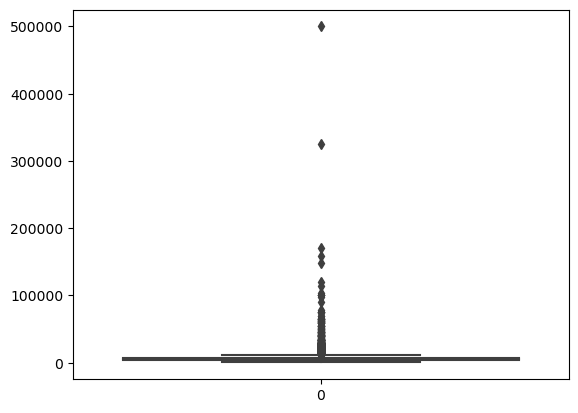

In [3]:
# Outlier Analysis
sns.boxplot(loan_data_updated['monthly_inc'])
plt.show()

In [4]:
### Remove outliers 
loan_data_updated = loan_data_updated[(loan_data_updated["annual_inc"] < 1250000 )]


## check if all stats related variables has valid values 
loan_data_updated.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec   

### Data Description
### Metadata Description & Summary metrics 

In [5]:
### Univariate Analysis - Metadata description, Data distribution plots, Summary metrics 
    #Metadata description - Ordered and unordered categorical variables  
    #Distribution plots - You can observe various visible patterns in the plots and try to understand how they came to be.  
    #Summary metrics - are used to obtain a quantitative summary of the data. Not all metrics can be used everywhere. 
    #Thus, it is important to understand the data and then choose what metric to use to summarise the data.
#loan_data_updated.info()
###DATA CLEANING - FIX THE ROWS  - create a sub dataset with specific data e.g here the list of defaulters 
#add and observed just defaulters "Charged Off"
print("\n-----------------------------------\n")

loan_data_of_charged_off = loan_data_updated[loan_data_updated["loan_status"]== "Charged Off"]
print("Loan Data of Defaulters " , loan_data_of_charged_off.shape)

#add and observed just sattled "Fully Paid"
loan_data_of_fully_paid = loan_data_updated[loan_data_updated["loan_status"]== "Fully Paid"]
print("Loan Data of Fully Paid Clients " , loan_data_of_fully_paid.shape)
#print("loan_data_of_fully_paid less than 10 k  " , loan_data_of_fully_paid[loan_data_of_fully_paid["monthly_income_category"]=="VERY LOW < 10K"].shape)

#add and observed just in progess "Current"
loan_data_of_current_ongoing = loan_data_updated[loan_data_updated["loan_status"]== "Current"]
print("Loan Data of Fully Current Clients " , loan_data_of_current_ongoing.shape)
#print("loan_data_of_current_ongoing less than 10 k  " , loan_data_of_current_ongoing[loan_data_of_current_ongoing["monthly_income_category"]=="VERY LOW < 10K"].shape)

print("\n-----------------------------------\n")


##Metadata 
print("All Numeric field AnalysisList of all Verification status - \n",loan_data_updated.describe(include=[np.number] ) )
print("\n-----------------------------------\n")
print("List of Verification status -  \n " ,loan_data_updated.verification_status.unique() )
print("\n-----------------------------------\n")
print("List of Purposes of Loan -   \n " ,loan_data_updated.purpose.unique() )
print("\n-----------------------------------\n")
print("List of home ownership Status - \n  " ,loan_data_updated.home_ownership.unique() )
print("\n-----------------------------------\n")
print("List of employment Status -  \n " ,loan_data_updated.emp_length.unique() )
print("\n-----------------------------------\n")
print("List of Bankcuptics Status -  \n " ,loan_data_updated.rec_bankruptcy.unique() )
print("\n-----------------------------------\n")
print("List of monthly income category Status -  \n " ,loan_data_updated.monthly_income_category.unique() )
print("\n-----------------------------------\n")
print("List of Loan Status / Type -  \n " ,loan_data_updated.loan_status.unique() )
print("\n-----------------------------------\n")
print("List of Loan Interest Rate Range -  \n " ,loan_data_updated.interest_rate_range.unique() )
print("\n-----------------------------------\n")



-----------------------------------

Loan Data of Defaulters  (5626, 57)
Loan Data of Fully Paid Clients  (32943, 57)
Loan Data of Fully Current Clients  (1140, 57)

-----------------------------------

All Numeric field AnalysisList of all Verification status - 
               id  member_id  loan_amnt  funded_amnt  funded_amnt_inv     term  \
count   39709.00   39709.00   39709.00     39709.00         39709.00 39709.00   
mean   683155.15  850492.37   11219.67     10948.12         10397.97    42.42   
std    210691.66  265673.30    7456.75      7187.58          7128.79    10.62   
min     54734.00   70699.00     500.00       500.00             0.00    36.00   
25%    516227.00  666804.00    5500.00      5400.00          5000.00    36.00   
50%    665705.00  850851.00   10000.00      9600.00          8975.00    36.00   
75%    837769.00 1047351.00   15000.00     15000.00         14400.00    60.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00    60.00   

    

### Univariate Analysis - Ordered and unordered categorical variables and SEGMENTED Univariate Analysis 
1. VERIFICATION STATUS ANALYSIS
2. TERM ANALYSIS
3. HOME OWNERSHIP STATUS ANALYSIS
4. EMPLOYEE EXPERIENCE ANALYSIS
5. LOAN TYPE / PURPOSE ANALYSIS
6. NUMBER OF PUBLIC BANKRUPTIES ANALYSIS
7. ISSUE MONTH ANALYSIS
8. LAST PAYMENT MONTH ANALYSIS
9. Number of Loans given under each type status wise (verified / not verified )


VERIFICATION STATUS ANALYSIS


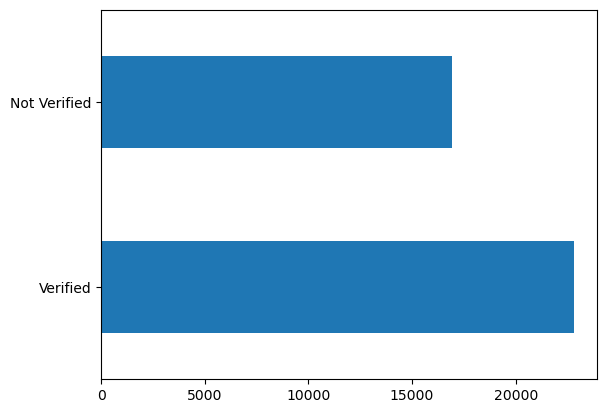

In [6]:
print("VERIFICATION STATUS ANALYSIS") 
loan_data_updated['verification_status'].value_counts().plot.barh()
plt.show()

TERM ANALYSIS


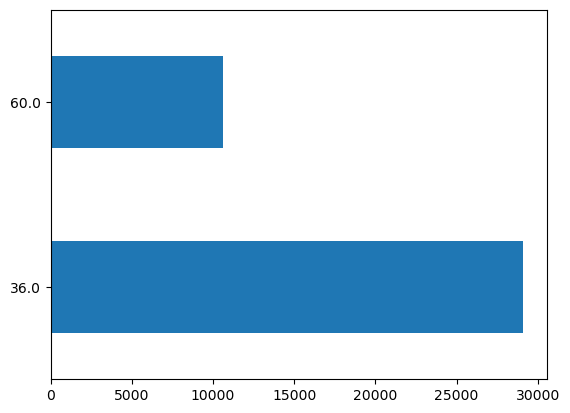

In [7]:
print("TERM ANALYSIS") 
loan_data_updated['term'].value_counts().plot.barh()
plt.show()

HOME OWNERSHIP STATUS ANALYSIS


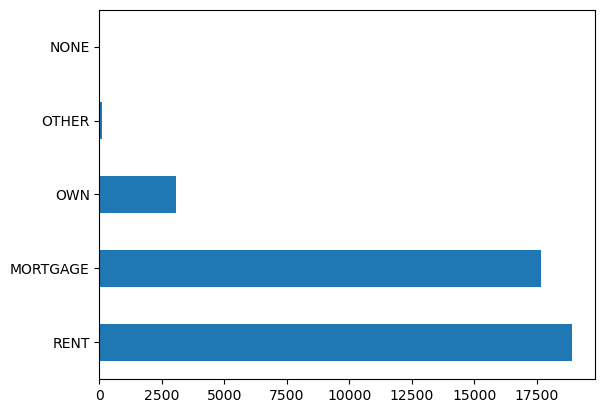

In [8]:
print("HOME OWNERSHIP STATUS ANALYSIS") 
loan_data_updated['home_ownership'].value_counts().plot.barh()
plt.show()


EMPLOYEE EXPERIENCE ANALYSIS


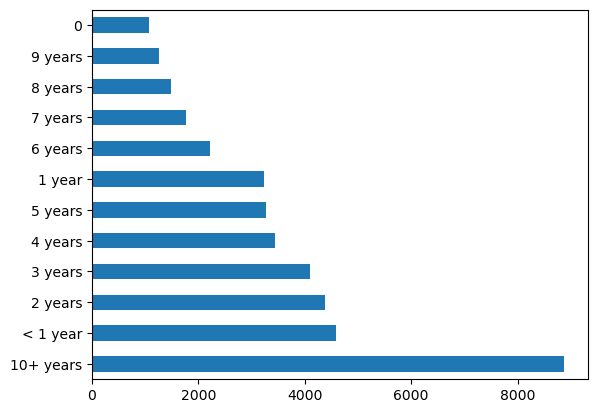

In [9]:
print("EMPLOYEE EXPERIENCE ANALYSIS") 
#emp_length = loan_data_updated.groupby("emp_length").count()[["id"]]
#emp_length
loan_data_updated['emp_length'].value_counts().plot.barh()
plt.show()

LOAN TYPE / PURPOSE ANALYSIS


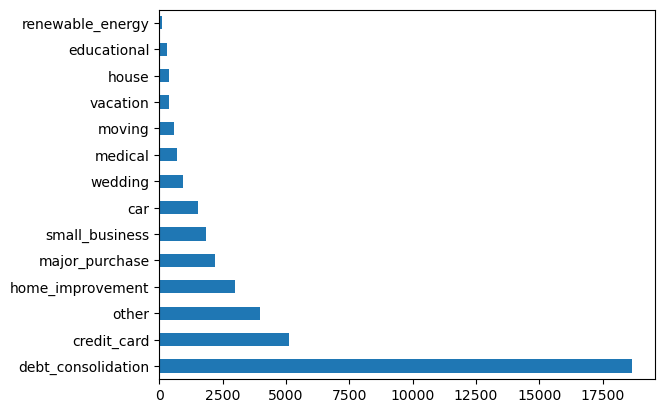

In [10]:
print("LOAN TYPE / PURPOSE ANALYSIS") 
loan_data_updated['purpose'].value_counts().plot.barh()
plt.show()

NUMBER OF PUBLIC BANKRUPTIES ANALYSIS


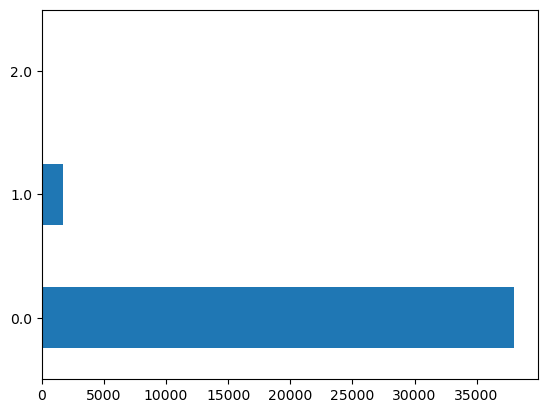

In [11]:
print("NUMBER OF PUBLIC BANKRUPTIES ANALYSIS") 
loan_data_updated['rec_bankruptcy'].value_counts().plot.barh()
plt.show()

ISSUE MONTH ANALYSIS


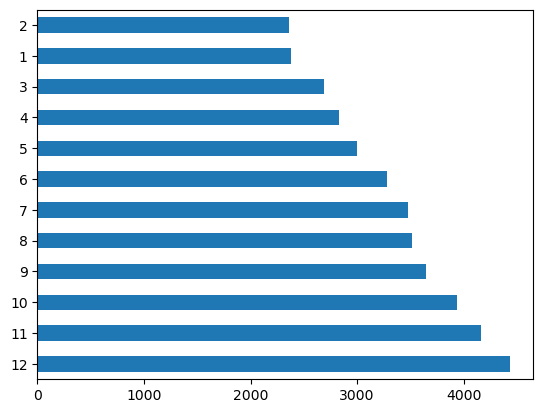

In [12]:
print("ISSUE MONTH ANALYSIS") 
loan_data_updated['issue_month'].value_counts().plot.barh()
plt.show()

LAST PAYMENT MONTH ANALYSIS


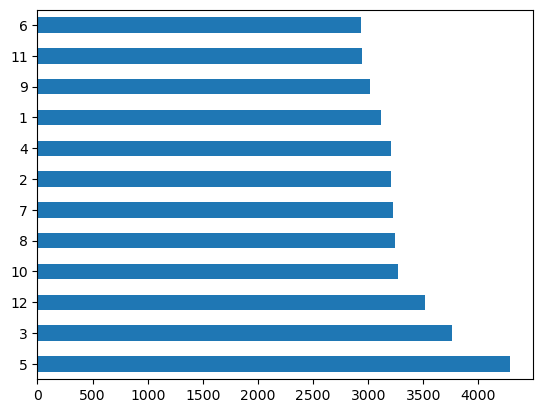

In [13]:
print("LAST PAYMENT MONTH ANALYSIS") 
#loan_data_of_charged_off['last_pymnt_d']
pd.DatetimeIndex(loan_data_updated['last_pymnt_d']).month.value_counts().plot.barh()
plt.show()

In [14]:
print("Number of Loans given under each type status wise (verified / not verified )") 
lengthofloan = pd.pivot_table(data=loan_data_updated, index=[ 'verification_status','loan_status'  ], columns="purpose"  , aggfunc=(len),fill_value=0, margins=True)["id"]
lengthofloan.columns.name = None
lengthofloan


Number of Loans given under each type status wise (verified / not verified )


car  credit_card  debt_consolidation  \
verification_status loan_status                                          
Not Verified        Charged Off    68          202                 941   
                    Current        28           22                  93   
                    Fully Paid    723         2043                6278   
Verified            Charged Off    92          340                1825   
                    Current        22           81                 493   
                    Fully Paid    616         2441                9007   
All                              1549         5129               18637   

                                 educational  home_improvement  house  \
verification_status loan_status                                         
Not Verified        Charged Off           39               144     24   
                    Current                0                14      2   
                    Fully Paid           191              1065    113   
Verified            Charged Off           17               203     35   
                    Current                0                87     12   
                    Fully Paid            78              1461    195   
All                                      325              2974    381   

                                 major_purchase  medical  moving  other  \
verification_status loan_status                                           
Not Verified        Charged Off              98       50      34    317   
                    Current                  11        2       1     37   
                    Fully Paid              944      254     205   1719   
Verified            Charged Off             124       56      58    316   
                    Current                  26       10       6     91   
                    Fully Paid              983      321     279   1513   
All                                        2186      693     583   3993   

                                 renewable_energy  small_business  vacation  \
verification_status loan_status                                               
Not Verified        Charged Off                 9             161        24   
                    Current                     0              10         2   
                    Fully Paid                 28             492       148   
Verified            Charged Off                10             314        29   
                    Current                     1              64         4   
                    Fully Paid                 55             787       174   
All                                           103            1828       381   

                                 wedding    All  
verification_status loan_status                  
Not Verified        Charged Off       31   2142  
                    Current            5    227  
                    Fully Paid       344  14547  
Verified            Charged Off       65   3484  
                    Current           16    913  
                    Fully Paid       486  18396  
All                                  947  39709

In [15]:
print("Number of Loans given under each type state wise (verified / not verified )") 
lengthofloan = pd.pivot_table(data=loan_data_updated, index=[ 'verification_status','loan_status'   ], columns="addr_state"  , aggfunc=(len),fill_value=0, margins=True)["id"]
lengthofloan.columns.name = None
lengthofloan

Number of Loans given under each type state wise (verified / not verified )


AK   AL   AR   AZ    CA   CO   CT   DC   DE  \
verification_status loan_status                                                
Not Verified        Charged Off   2   15   10   46   412   51   40    5    4   
                    Current       0    5    2    5    27    2    3    1    0   
                    Fully Paid   26  183   85  307  2427  321  294   65   56   
Verified            Charged Off  13   39   17   77   713   47   54   10    8   
                    Current       2   12    8   25   123   24   22    2    1   
                    Fully Paid   37  198  123  419  3395  346  338  131   45   
All                              80  452  245  879  7097  791  751  214  114   

                                   FL    GA   HI  IA  ID    IL  IN   KS   KY  \
verification_status loan_status                                                
Not Verified        Charged Off   206    83   14   0   1    77   0   12   11   
                    Current        21     8    2   0   0     9   0    6    2   
                    Fully Paid    991   487   59   5   5   595   9  104  110   
Verified            Charged Off   298   132   14   0   0   120   0   19   34   
                    Current        64    31    6   0   0    38   0   10   12   
                    Fully Paid   1285   657   79   0   0   686   0  120  156   
All                              2865  1398  174   5   6  1525   9  271  325   

                                  LA    MA    MD  ME   MI   MN   MO  MS  MT  \
verification_status loan_status                                               
Not Verified        Charged Off   18    55    58   0   35   36   50   2   3   
                    Current        2     8     6   0    2    2    4   0   0   
                    Fully Paid   170   524   353   3  271  243  255  11  35   
Verified            Charged Off   35   104   104   0   67   45   64   0   8   
                    Current        7    35    20   0   14    8   12   0   2   
                    Fully Paid   204   614   508   0  330  281  301   6  37   
All                              436  1340  1049   3  719  615  686  19  85   

                                  NC  NE   NH    NJ   NM   NV    NY    OH  \
verification_status loan_status                                             
Not Verified        Charged Off   43   3    8   103    7   43   177    60   
                    Current        6   0    3     8    1    2    20    14   
                    Fully Paid   265   2   65   663   64  153  1390   499   
Verified            Charged Off   71   0   17   175   23   65   318    95   
                    Current       32   0    2    52    5   16    94    31   
                    Fully Paid   371   0   76   849   88  218  1812   524   
All                              788   5  171  1850  188  497  3811  1223   

                                  OK   OR    PA   RI   SC  SD  TN    TX   UT  \
verification_status loan_status                                                
Not Verified        Charged Off   14   34    75    8   24   6   0   115   13   
                    Current        2    2    13    2    5   1   0    13    2   
                    Fully Paid   106  169   621   81  178  28  13  1000   99   
Verified            Charged Off   26   37   105   17   42   6   2   201   27   
                    Current       10   14    36    2    8   1   0    55    4   
                    Fully Paid   141  195   667   88  215  22   2  1342  113   
All                              299  451  1517  198  472  64  17  2726  258   

                                   VA  VT   WA   WI   WV  WY    All  
verification_status loan_status                                      
Not Verified        Charged Off    64   4   54   28   12   1   2142  
                    Current         6   0    3    6    1   0    227  
                    Fully Paid    528  26  299  196   69  39  14547  
Verified            Charged Off   113   2   73   35    9   3   3484  
                    Current        32   1   

### DERIVED METRICS - BUSINESS , TYPE and DATA 
<h6> MONTHLY INCOME CATEGORY / RANGE ANALYSIS</h6>
Created New column for income category to make the better analysis 
<h6> Number of Loans based on the income category, Status (verified / not verified) and state  </h6>
<h6> Number of Loans based on the income category, rec_bankruptcy and state</h6>
<h6> Number of Loans based on the income category, last payment done (month and year wise) </h6>

 

MONTHLY INCOME CATEGORY / RANGE ANALYSIS of ALL Users


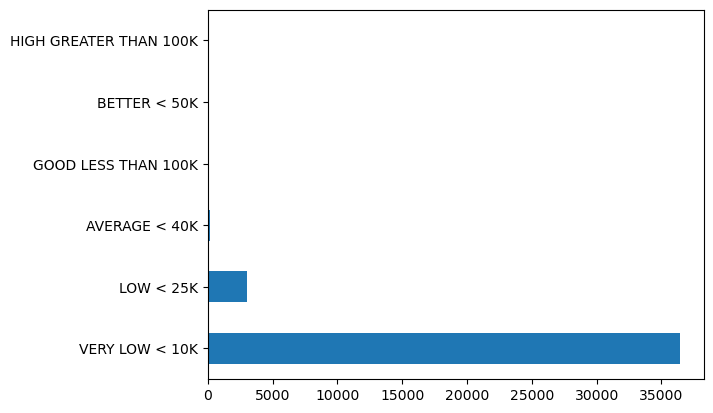

In [16]:
#created monthly income column which specify the range of monthly inc
print("MONTHLY INCOME CATEGORY / RANGE ANALYSIS of ALL Users") 
loan_data_updated['monthly_income_category'].value_counts().plot.barh()
plt.show()

MONTHLY INCOME CATEGORY / RANGE Interest Rate Anaylsis 


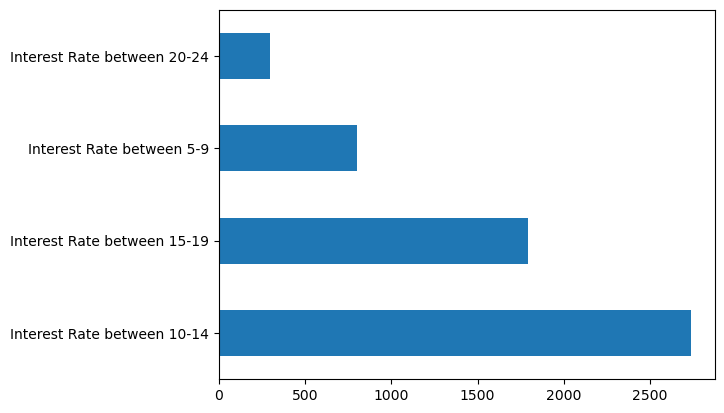

In [17]:
print("MONTHLY INCOME CATEGORY / RANGE Interest Rate Anaylsis ") 
loan_data_of_charged_off['interest_rate_range'].value_counts().plot.barh()
plt.show()

In [18]:
#created new column monthly inc at the start to check if loan amount is > 40% of monthly income
installment_grater_than_monthly_inc = loan_data_of_charged_off[loan_data_of_charged_off["installment"]>((loan_data_of_charged_off["monthly_inc"]/100)*50)][[ "monthly_income_category","id","loan_amnt","term","installment","monthly_inc"]]
print("total defaulters where loan amount is > 40% of monthly income ",installment_grater_than_monthly_inc.shape)

#installment_grater_than_monthly_inc["40_per"]=((loan_data_of_charged_off["monthly_inc"]/100)*40)
#installment_grater_than_monthly_inc["pay_with_interest"]= (loan_data_of_charged_off["term"]*loan_data_of_charged_off["installment"])  
#installment_grater_than_monthly_inc["last_pymnt_month_year"] =  loan_data_of_charged_off['last_pymnt_d'].apply(lambda x: x.strftime('%b-%Y')) 


#print("Number of Loans based on the income category, last payment done (month and year wise)  ")  
#mask_orcurrentyeardata =(pd.to_datetime(install_grater_than_monthly_inc['last_pymnt_month_year']).dt.year==2023)
#forcurrentyeardata = install_grater_than_monthly_inc[mask_orcurrentyeardata]
#lengthofloan = pd.pivot_table(data=forcurrentyeardata, index=['last_pymnt_month_year'], columns="monthly_income_category"  , aggfunc=(len),fill_value=0)["id"]
#lengthofloan


total defaulters where loan amount is > 40% of monthly income  (0, 6)


MONTHLY INCOME CATEGORY / RANGE ANALYSIS of ALL Users


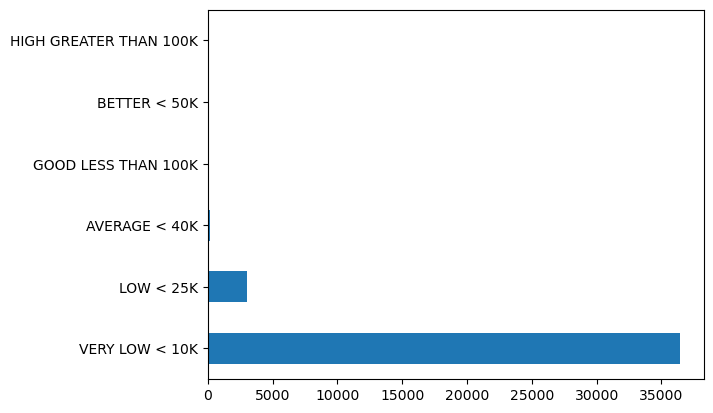

In [19]:
#created monthly income column which specify the range of monthly inc
print("MONTHLY INCOME CATEGORY / RANGE ANALYSIS of ALL Users") 
loan_data_updated['monthly_income_category'].value_counts().plot.barh()
plt.show()

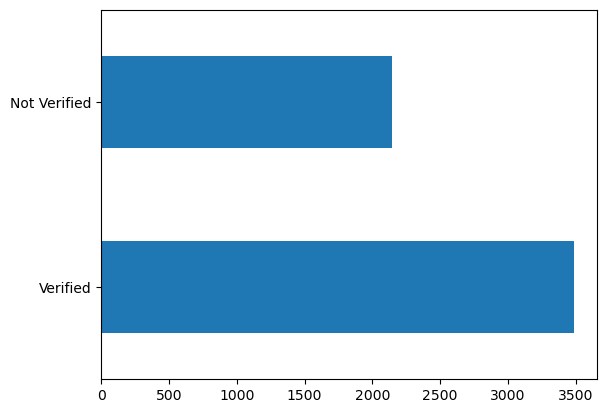

In [20]:
defaulter_verified_status = loan_data_of_charged_off['verification_status'].value_counts()  
defaulter_verified_status.plot.barh()
plt.show()

In [21]:
print("Number of defaulters Loans based on the income category, rec_bankruptcy    ") 
numberofdefaultersasperincomeandbankruptcy = pd.pivot_table(data=loan_data_of_charged_off, index=[  "monthly_income_category" ], columns="rec_bankruptcy"  , aggfunc=(len),fill_value=0, margins=True)["id"]
numberofdefaultersasperincomeandbankruptcy


Number of defaulters Loans based on the income category, rec_bankruptcy    


rec_bankruptcy,0.0,1.0,2.0,All
monthly_income_category,,,,
AVERAGE < 40K,11,1,0,12
BETTER < 50K,4,0,0,4
GOOD LESS THAN 100K,7,0,0,7
LOW < 25K,312,12,0,324
VERY LOW < 10K,4924,353,2,5279
All,5258,366,2,5626


In [22]:
print("Number of Loans based on the income category, Status (verified / not verified) and state  ") 
lengthofloan = pd.pivot_table(data=loan_data_of_charged_off, index=[  'verification_status' ,"monthly_income_category" ], columns="addr_state"  , aggfunc=(len),fill_value=0, margins=True)["id"]
lengthofloan.columns.name = None
lengthofloan



Number of Loans based on the income category, Status (verified / not verified) and state  


AK  AL  AR   AZ    CA  CO  CT  \
verification_status monthly_income_category                                  
Not Verified        AVERAGE < 40K             0   0   0    0     1   0   0   
                    GOOD LESS THAN 100K       0   0   0    1     0   0   0   
                    LOW < 25K                 0   0   0    1    19   1   0   
                    VERY LOW < 10K            2  15  10   44   392  50  40   
Verified            AVERAGE < 40K             0   0   0    0     2   0   0   
                    BETTER < 50K              1   0   0    0     0   0   0   
                    GOOD LESS THAN 100K       0   0   0    0     1   0   0   
                    LOW < 25K                 1   3   2    5    59   3   5   
                    VERY LOW < 10K           11  36  15   72   651  44  49   
All                                          15  54  27  123  1125  98  94   

                                             DC  DE   FL   GA  HI  ID   IL  \
verification_status monthly_income_category                                  
Not Verified        AVERAGE < 40K             0   0    1    0   0   0    0   
                    GOOD LESS THAN 100K       0   0    2    0   0   0    0   
                    LOW < 25K                 0   0    9    3   1   0    1   
                    VERY LOW < 10K            5   4  194   80  13   1   76   
Verified            AVERAGE < 40K             0   0    0    0   0   0    0   
                    BETTER < 50K              0   0    2    0   0   0    0   
                    GOOD LESS THAN 100K       0   0    0    0   0   0    0   
                    LOW < 25K                 2   0   15    9   0   0    6   
                    VERY LOW < 10K            8   8  281  123  14   0  114   
All                                          15  12  504  215  28   1  197   

                                             KS  KY  LA   MA   MD   MI  MN  \
verification_status monthly_income_category                                  
Not Verified        AVERAGE < 40K             0   0   0    0    0    0   0   
                    GOOD LESS THAN 100K       0   0   0    0    0    0   0   
                    LOW < 25K                 1   1   0    1    5    2   0   
                    VERY LOW < 10K           11  10  18   54   53   33  36   
Verified            AVERAGE < 40K             0   0   0    2    1    0   0   
                    BETTER < 50K              0   0   0    0    0    0   0   
                    GOOD LESS THAN 100K       0   0   0    0    0    0   0   
                    LOW < 25K                 1   0   3   11    9    6   0   
                    VERY LOW < 10K           18  34  32   91   94   61  45   
All                                          31  45  53  159  162  102  81   

                                              MO  MS  MT   NC  NE  NH   NJ  \
verification_status monthly_income_category                                  
Not Verified        AVERAGE < 40K              0   0   0    0   0   0    0   
                    GOOD LESS THAN 100K        0   0   0    0   0   0    0   
                    LOW < 25K                  1   0   0    1   0   0    5   
                    VERY LOW < 10K            49   2   3   42   3   8   98   
Verified            AVERAGE < 40K              0   0   0    0   0   0    0   
                    BETTER < 50K               0   0   0    0   0   0    0   
                    GOOD LESS THAN 100K        0   0   0    0   0   0    0   
                    LOW < 25K                  3   0   2    3   0   3   11   
                    VERY LOW < 10K            61   0   6   68   0  14  164   
All                                          114   2  11  114   3  25  278   

                                             NM   NV   NY   OH  OK  OR   PA  \
verification_status monthly_income_category                                   
Not Verified        AVERAGE < 40K             0    0    0    0   0   0    0   
                    GOOD LESS THAN 100K       0    1    0   

### Bivariate analysis 
<h6>Impact of earning level on loan on Loan Type</h6>
<h6>Impact of verification_status & loan type on earning level</h6>
<h6>Impact of experience on loan type and loan payment</h6>
<h6>Impact of verification status, loan type on states</h6>
<h6>Impact of verification_status, issue date on loan type</h6>

Impact of earning level on loan on Loan Type


[]

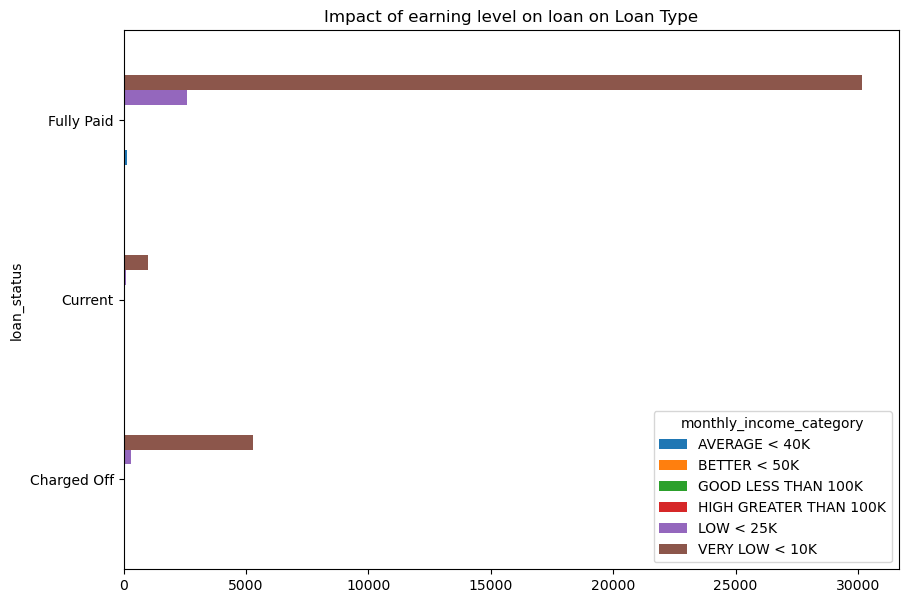

In [23]:
print("Impact of earning level on loan on Loan Type")
lengthofloan = pd.pivot_table(data=loan_data_updated, index=['loan_status' ], columns=[ "monthly_income_category"]  , aggfunc=(len),fill_value=0)["id"].plot.barh(figsize=(10,7),
                                                          title='Impact of earning level on loan on Loan Type')
lengthofloan.plot()


Impact of verification_status & loan type on earning level


[]

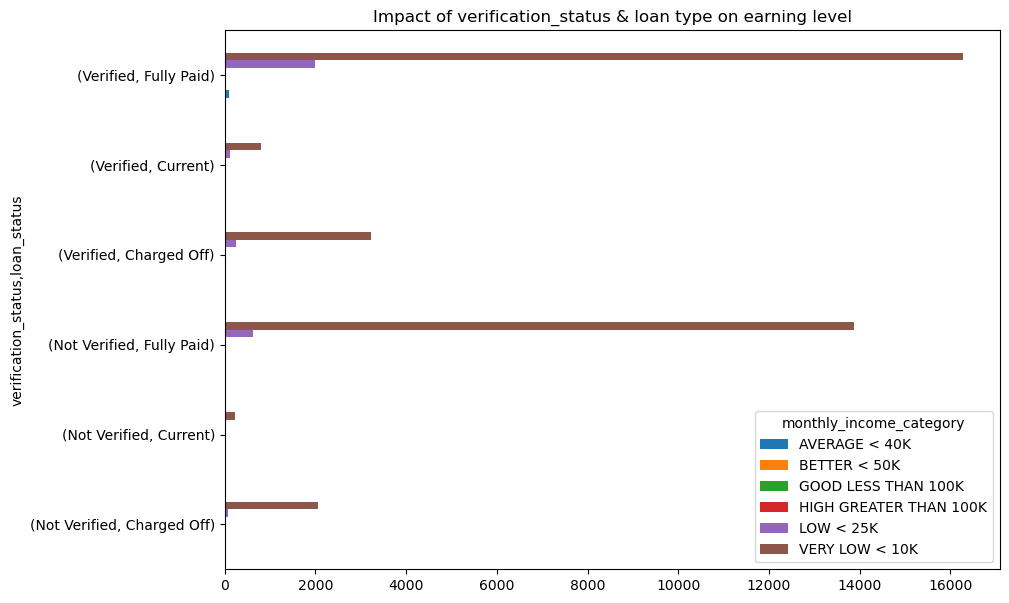

In [24]:
print("Impact of verification_status & loan type on earning level")
lengthofloan = pd.pivot_table(data=loan_data_updated, index=['verification_status','loan_status'], columns="monthly_income_category"  , aggfunc=(len),fill_value=0)["id"].plot.barh(figsize=(10,7),
                                                          title='Impact of verification_status & loan type on earning level')
lengthofloan.plot()



In [25]:
print("Impact of experience on loan type and loan payment")
lengthofloan = pd.pivot_table(data=loan_data_updated, index=['emp_length','loan_status'], columns=[ "monthly_income_category" ]  , aggfunc=(len),fill_value=0, margins=True)["id"]  
lengthofloan 




Impact of experience on loan type and loan payment


monthly_income_category  AVERAGE < 40K  BETTER < 50K  GOOD LESS THAN 100K  \
emp_length loan_status                                                      
0          Charged Off               1             0                    0   
           Current                   0             0                    0   
           Fully Paid                1             0                    1   
1 year     Charged Off               1             0                    0   
           Current                   0             0                    0   
           Fully Paid               11             3                    1   
10+ years  Charged Off               4             2                    3   
           Current                   2             0                    0   
           Fully Paid               48             6                   14   
2 years    Charged Off               1             0                    0   
           Current                   0             0                    0   
           Fully Paid               10             2                    5   
3 years    Charged Off               2             0                    0   
           Current                   0             0                    0   
           Fully Paid               14             2                    3   
4 years    Charged Off               1             1                    2   
           Current                   0             0                    0   
           Fully Paid                5             3                    0   
5 years    Charged Off               0             0                    1   
           Current                   1             0                    0   
           Fully Paid               10             3                    1   
6 years    Charged Off               1             0                    1   
           Current                   0             0                    0   
           Fully Paid                3             3                    0   
7 years    Charged Off               1             0                    0   
           Current                   0             0                    0   
           Fully Paid                3             0                    2   
8 years    Charged Off               0             0                    0   
           Current                   0             0                    1   
           Fully Paid                6             0                    4   
9 years    Charged Off               0             0                    0   
           Current                   0             0                    0   
           Fully Paid                5             0                    1   
< 1 year   Charged Off               0             1                    0   
           Current                   1             0                    0   
           Fully Paid               12             1                    0   
All                                144            27                   40   

monthly_income_category  HIGH GREATER THAN 100K  LOW < 25K  VERY LOW < 10K  \
emp_length loan_status                                                       
0          Charged Off                        0          2             225   
           Current                            0          1              41   
           Fully Paid                         0         21             782   
1 year     Charged Off                        0         20             435   
           Current                            0          5              66   
           Fully Paid                         2        174            2522   
10+ years  Charged Off                        0         94            1228   
           Current                            0         56             333   
           Fully Paid                         2        823            6262   
2 years    Charged Off                        0         29             536   
           Current                            0         11  

In [26]:
#int_rate
print("Impact of interest rate, loan type   ")
impact_intrate_emplegth = pd.pivot_table(data=loan_data_of_charged_off, index=['interest_rate_range'], columns=["emp_length" ]  , aggfunc=(len),fill_value=0, margins=True)["id"]   
impact_intrate_emplegth 


Impact of interest rate, loan type   


emp_length,0,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,All
interest_rate_range,,,,,,,,,,,,,
Interest Rate between 10-14,109,242,612,293,278,207,223,144,136,96,68,329,2737
Interest Rate between 15-19,50,125,450,185,188,156,154,105,83,65,56,177,1794
Interest Rate between 20-24,5,24,91,22,22,30,25,16,18,9,7,27,296
Interest Rate between 5-9,64,65,178,66,67,69,56,42,26,33,27,106,799
All,228,456,1331,566,555,462,458,307,263,203,158,639,5626


In [27]:
#int_rate
print("Impact of interest rate, loan type   ")
impact_intrate_monthlyinc = pd.pivot_table(data=loan_data_of_charged_off, index=['interest_rate_range'], columns=["monthly_income_category" ]  , aggfunc=(len),fill_value=0, margins=True)["id"]   
impact_intrate_monthlyinc 

Impact of interest rate, loan type   


monthly_income_category,AVERAGE < 40K,BETTER < 50K,GOOD LESS THAN 100K,LOW < 25K,VERY LOW < 10K,All
interest_rate_range,,,,,,
Interest Rate between 10-14,5,2,2,131,2597,2737
Interest Rate between 15-19,3,1,4,131,1655,1794
Interest Rate between 20-24,3,1,0,36,256,296
Interest Rate between 5-9,1,0,1,26,771,799
All,12,4,7,324,5279,5626


In [28]:
#int_rate
print("Impact of interest rate, loan type   ")
impact_emplength_monthly_ic = pd.pivot_table(data=loan_data_of_charged_off, index=['emp_length' ], columns=["monthly_income_category" ]  , aggfunc=(len),fill_value=0, margins=True)["id"]   
impact_emplength_monthly_ic 

Impact of interest rate, loan type   


monthly_income_category,AVERAGE < 40K,BETTER < 50K,GOOD LESS THAN 100K,LOW < 25K,VERY LOW < 10K,All
emp_length,,,,,,
0,1,0,0,2,225,228
1 year,1,0,0,20,435,456
10+ years,4,2,3,94,1228,1331
2 years,1,0,0,29,536,566
3 years,2,0,0,27,526,555
4 years,1,1,2,25,433,462
5 years,0,0,1,30,427,458
6 years,1,0,1,17,288,307
7 years,1,0,0,17,245,263


In [29]:
print("Impact of verification status, loan type on states   ")
lengthofloan = pd.pivot_table(data=loan_data_updated, index=['verification_status','loan_status'], columns=["addr_state" ]  , aggfunc=(len),fill_value=0, margins=True)["id"]   
lengthofloan 

Impact of verification status, loan type on states   


addr_state                       AK   AL   AR   AZ    CA   CO   CT   DC   DE  \
verification_status loan_status                                                
Not Verified        Charged Off   2   15   10   46   412   51   40    5    4   
                    Current       0    5    2    5    27    2    3    1    0   
                    Fully Paid   26  183   85  307  2427  321  294   65   56   
Verified            Charged Off  13   39   17   77   713   47   54   10    8   
                    Current       2   12    8   25   123   24   22    2    1   
                    Fully Paid   37  198  123  419  3395  346  338  131   45   
All                              80  452  245  879  7097  791  751  214  114   

addr_state                         FL    GA   HI  IA  ID    IL  IN   KS   KY  \
verification_status loan_status                                                
Not Verified        Charged Off   206    83   14   0   1    77   0   12   11   
                    Current        21     8    2   0   0     9   0    6    2   
                    Fully Paid    991   487   59   5   5   595   9  104  110   
Verified            Charged Off   298   132   14   0   0   120   0   19   34   
                    Current        64    31    6   0   0    38   0   10   12   
                    Fully Paid   1285   657   79   0   0   686   0  120  156   
All                              2865  1398  174   5   6  1525   9  271  325   

addr_state                        LA    MA    MD  ME   MI   MN   MO  MS  MT  \
verification_status loan_status                                               
Not Verified        Charged Off   18    55    58   0   35   36   50   2   3   
                    Current        2     8     6   0    2    2    4   0   0   
                    Fully Paid   170   524   353   3  271  243  255  11  35   
Verified            Charged Off   35   104   104   0   67   45   64   0   8   
                    Current        7    35    20   0   14    8   12   0   2   
                    Fully Paid   204   614   508   0  330  281  301   6  37   
All                              436  1340  1049   3  719  615  686  19  85   

addr_state                        NC  NE   NH    NJ   NM   NV    NY    OH  \
verification_status loan_status                                             
Not Verified        Charged Off   43   3    8   103    7   43   177    60   
                    Current        6   0    3     8    1    2    20    14   
                    Fully Paid   265   2   65   663   64  153  1390   499   
Verified            Charged Off   71   0   17   175   23   65   318    95   
                    Current       32   0    2    52    5   16    94    31   
                    Fully Paid   371   0   76   849   88  218  1812   524   
All                              788   5  171  1850  188  497  3811  1223   

addr_state                        OK   OR    PA   RI   SC  SD  TN    TX   UT  \
verification_status loan_status                                                
Not Verified        Charged Off   14   34    75    8   24   6   0   115   13   
                    Current        2    2    13    2    5   1   0    13    2   
                    Fully Paid   106  169   621   81  178  28  13  1000   99   
Verified            Charged Off   26   37   105   17   42   6   2   201   27   
                    Current       10   14    36    2    8   1   0    55    4   
                    Fully Paid   141  195   667   88  215  22   2  1342  113   
All                              299  451  1517  198  472  64  17  2726  258   

addr_state                         VA  VT   WA   WI   WV  WY    All  
verification_status loan_status                                      
Not Verified        Charged Off    64   4   54   28   12   1   2142  
                    Current         6   0    3    6    1   0    227  
                    Fully Paid    528  26  299  196   69  39  14547  
Verified            Charged Off   113   2   73   35    9   3   3484  
           

In [30]:
print("Impact of verification_status, issue date on loan type  ")
verification_status_loan_types = pd.pivot_table(data=loan_data_updated, index=['verification_status',"issue_d_month" ], columns=["loan_status"]  , aggfunc=(len),fill_value=0, margins=True)["id"]   
verification_status_loan_types 


Impact of verification_status, issue date on loan type  


loan_status                        Charged Off  Current  Fully Paid    All
verification_status issue_d_month                                         
Not Verified        April                  159        1        1213   1373
                    August                 145       30        1049   1224
                    December               255       38        1571   1864
                    February               139        0        1054   1193
                    January                167        0        1068   1235
                    July                   165       41        1224   1430
                    June                   191       20        1113   1324
                    March                  154        1        1291   1446
                    May                    170       21        1120   1311
                    November               221       21        1499   1741
                    October                213       28        1281   1522
                    September              163       26        1064   1253
Verified            April                  211        2        1248   1461
                    August                 323      100        1871   2294
                    December               423      180        1966   2569
                    February               151        0        1014   1165
                    January                154        0         990   1144
                    July                   313       84        1648   2045
                    June                   292       79        1583   1954
                    March                  193        0        1052   1245
                    May                    296       59        1332   1687
                    November               377      140        1906   2423
                    October                367      145        1900   2412
                    September              384      124        1886   2394
All                                       5626     1140       32943  39709

In [31]:
print("Impact of verification_status, issue date on defaulters ")
verification_status_loan_type_defaulters = pd.pivot_table(data=loan_data_of_charged_off, index=['verification_status',"issue_d_month" ], columns=["loan_status"]  , aggfunc=(len),fill_value=0 )["id"]   
verification_status_loan_type_defaulters 

Impact of verification_status, issue date on defaulters 


loan_status                        Charged Off
verification_status issue_d_month             
Not Verified        April                  159
                    August                 145
                    December               255
                    February               139
                    January                167
                    July                   165
                    June                   191
                    March                  154
                    May                    170
                    November               221
                    October                213
                    September              163
Verified            April                  211
                    August                 323
                    December               423
                    February               151
                    January                154
                    July                   313
                    June                   292
                    March                  193
                    May                    296
                    November               377
                    October                367
                    September              384

The observation is as follows 
-------------------------------- 
Total Applicant (except outliers) , 39709
Total defaulters , 5626
Total current paying clients [Regular Clients] , 1140
Total full payment done clients  , 32943
Total Applicant (except outliers) , 39709
Total % of defaulters , 14.168072729104233
Total % of current paying clients [Regular Clients] , 2.870885693419628
Total % of full payment done clients  , 82.96104157747614

The Defaulters observations is as follows 
VERIFICATION STATUS ANALYSIS
Verified        3484
Not Verified    2142
Name: verification_status, dtype: int64


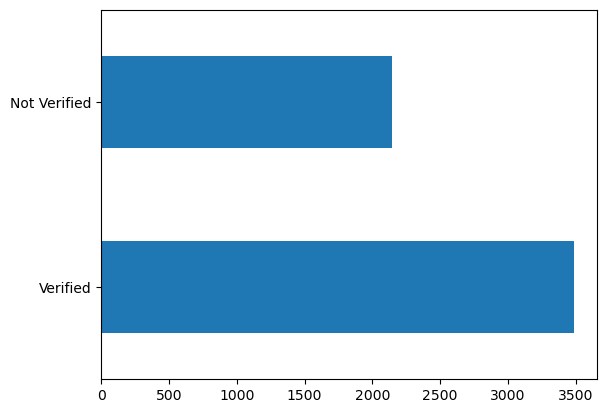

-------------------------------- 
Total verified defaulters , 3484
Total unverified defaulters , 2142
-------------------------------- 
Total % of verified defaulters , 61.926768574475645
Total % of unverified defaulters , 38.07323142552435
-------------------------------- 
Number of defaulters Loans based on the income category, rec_bankruptcy    
rec_bankruptcy            0.0  1.0  2.0   All
monthly_income_category                      
AVERAGE < 40K              11    1    0    12
BETTER < 50K                4    0    0     4
GOOD LESS THAN 100K         7    0    0     7
LOW < 25K                 312   12    0   324
VERY LOW < 10K           4924  353    2  5279
All                      5258  366    2  5626
-------------------------------- 
Number of defaulters based on experience and monthly income  
monthly_income_category  AVERAGE < 40K  BETTER < 50K  GOOD LESS THAN 100K  \
emp_length                                                                  
0                              

In [35]:
print("The observation is as follows ")
print("-------------------------------- ")
total_applicant = loan_data_updated.shape[0]
total_defaulters = loan_data_of_charged_off.shape[0]
total_current_paying_clients  = loan_data_of_current_ongoing.shape[0]
total_full_paymentdone_clients  = loan_data_of_fully_paid.shape[0]


print("Total Applicant (except outliers) ,",total_applicant)
print("Total defaulters ,", total_defaulters  )
print("Total current paying clients [Regular Clients] ,", total_current_paying_clients  )
print("Total full payment done clients  ,", total_full_paymentdone_clients )



print("Total Applicant (except outliers) ,",total_applicant)
print("Total % of defaulters ,",(total_defaulters / total_applicant)*100)
print("Total % of current paying clients [Regular Clients] ,",(total_current_paying_clients / total_applicant)*100)
print("Total % of full payment done clients  ,",(total_full_paymentdone_clients / total_applicant)*100)

print("\nThe Defaulters observations is as follows ")

print("VERIFICATION STATUS ANALYSIS") 
#defaulter_verified_status = loan_data_of_charged_off['verification_status'].value_counts()  
print(defaulter_verified_status)
total_verified_defaulters  = defaulter_verified_status[0]
total_unverified_defaulters  = defaulter_verified_status[1]
defaulter_verified_status.plot.barh()
plt.show()
print("-------------------------------- ")
print("Total verified defaulters ,", total_verified_defaulters  )
print("Total unverified defaulters ,", total_unverified_defaulters  )
print("-------------------------------- ")
print("Total % of verified defaulters ,",(total_verified_defaulters / total_defaulters)*100)
print("Total % of unverified defaulters ,",(total_unverified_defaulters / total_defaulters)*100)
print("-------------------------------- ")
print("Number of defaulters Loans based on the income category, rec_bankruptcy    ") 
print(numberofdefaultersasperincomeandbankruptcy )

print("-------------------------------- ")

print("Number of defaulters based on experience and monthly income  ") 
print(impact_emplength_monthly_ic )

print("Number of defaulters based on interest rate and monthly income  ") 
print(impact_intrate_monthlyinc )

print("Number of defaulters based on interest rate andexperience  ") 
print(impact_intrate_emplegth )


print("-------------------------------- ")
print("Maximum client base belogs to 'VERY LOW < 10K' this is for defaulter as well ")
print("In State wise didnt find any significant major difference in the analysis  ")
print("observation on the basis of issue date and defaulters  ")
print(verification_status_loan_type_defaulters)


print("1. Dafaulters are maximum whose year of experience is > 8 years but income is still < 10K \n"
      "2. Dafaulters are maximum whose rate of interest is >15% \n"
      "3. Here observed that number of loans are more in September, October, November and December months that last 3-4 months of the year\n "
      " This is Year End months where employee needs to complete year target so may be approval, verification processes are ignored or not strict "
      " which has created the issue related to defaulters or charged off "
      " around 43% loans are passed in these 4 months only. (28% verified and 15% unverified defaulters) So Bank needs to check it in detail  \n"
      "4. Loan needs be passed for verified clients. Verfication process should be accurate ")
